In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
#read excel file into dataframe concatenated with all sheets
def read_and_clean_data(filepath, df_name):
    # Read treatment data into dataframes
    no_diabetes = pd.read_excel(filepath, sheet_name='No_diabetes')
    pre_diabetes = pd.read_excel(filepath, sheet_name='Pre_diabetes')
    diabetes = pd.read_excel(filepath, sheet_name='Diabetes')

    # Create labels for each group
    no_diabetes['no_diabetes'] = 1
    no_diabetes['pre_diabetes'] = 0
    no_diabetes['diabetes'] = 0

    pre_diabetes['no_diabetes'] = 0
    pre_diabetes['pre_diabetes'] = 1
    pre_diabetes['diabetes'] = 0

    diabetes['no_diabetes'] = 0
    diabetes['pre_diabetes'] = 0
    diabetes['diabetes'] = 1

    # Concatenate dataframes
    treatment = pd.concat([no_diabetes, pre_diabetes, diabetes], ignore_index=True)
    
    # Drop the extra columns with error handling to avoid issues on rerun
    columns_to_drop = ['No diabetes', 'Pre-Diabetes', 'Diabetes']
    for col in columns_to_drop:
        try:
            treatment = treatment.drop(columns=[col])
        except:
            pass

    # Fill NaN values with 0 in specified columns
    columns_to_fill = ['Length of Stay', 'Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
    treatment[columns_to_fill] = treatment[columns_to_fill].fillna(0)

    # Rename columns
    treatment = treatment.rename(columns={ 'U69.*': 'U69', 'T81.*': 'T81', 'T84.*': 'T84', 'N17.*': 'N17', 'I21.*': 'I21', 'R96.*': 'R96',})

    #Assigning the user defined name to the dataframe
    globals()[df_name] = treatment


In [36]:
#read treatment group 1 data into dataframe
filepath = r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Data\Raw\Treatment group 1.xlsx'
read_and_clean_data(filepath, 'treatment_1')
treatment_1.head()

,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,1020062281,0,1,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,1020085314,1,0,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,1020047252,0,1,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,1019318116,0,1,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,1019349783,0,1,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


In [37]:
#read treatment group 3 data into dataframe
filepath = r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Data\Raw\Treatment group 3.xlsx'
read_and_clean_data(filepath, 'treatment_3')
treatment_3.head()

,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,1020200116,0,1,96,4,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,1020243858,1,0,96,4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,1020222420,0,1,95,14,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,1020224722,0,1,94,7,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,1020214108,0,1,94,7,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [38]:
#read treatment group 5 data into dataframe
filepath = r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Data\Raw\Treatment group 5.xlsx'
read_and_clean_data(filepath, 'treatment_5')
treatment_5.head()

,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,1020297217,0,1,97,5,25.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
1,1021069757,0,1,96,10,20.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,1021074803,0,1,96,9,21.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,1020345191,0,1,96,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,1021034940,1,0,96,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [39]:

#add a new column to each dataframe to identify the treatment group
treatment_1['treatment_group'] = 1 
treatment_3['treatment_group'] = 3
treatment_5['treatment_group'] = 5

#concatenate all treatment groups into one dataframe
all_treatment = pd.concat([treatment_1, treatment_3, treatment_5], ignore_index=True)


#shape of the dataframe
all_treatment.shape


(4320, 19)

In [40]:
all_treatment.head(-20)

,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,treatment_group
0,1020062281,0,1,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1
1,1020085314,1,0,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1
2,1020047252,0,1,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1
3,1019318116,0,1,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,1019349783,0,1,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1020341412,1,0,67,5,31.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,5
4296,1020339526,1,0,76,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,5
4297,1020339169,0,1,87,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,5
4298,1020335813,0,1,84,5,31.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,5


In [41]:
#add a new column gender to the dataframe
all_treatment['Gender']=all_treatment['Gender (F)'].apply(lambda x: 0 if x==1 else 1)
all_treatment.head()

,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,treatment_group,Gender
0,1020062281,0,1,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0
1,1020085314,1,0,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1
2,1020047252,0,1,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0
3,1019318116,0,1,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,1019349783,0,1,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,1,0


In [42]:
#adding age bins to check for age distribution
# Define age groups
age_groups = ['18-40', '40-60', '60+']

# Define bins and labels for the age groups
bins = [18, 40, 60, all_treatment['Age'].max()]
labels = age_groups

# Create a new column 'age_group' based on the age groups defined
all_treatment['age_group'] = pd.cut(all_treatment['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Create a new column coded as 0, 1, 2 for the age groups
all_treatment['age_group_code'] = all_treatment['age_group'].cat.codes


# Create a new column 'Condition' based on the condition groups defined as 0, 1, 2 
condition_labels  = [0]*all_treatment['no_diabetes'].sum() + \
                   [1]*all_treatment['pre_diabetes'].sum() + \
                   [2]*all_treatment['diabetes'].sum()
all_treatment['Conditions'] = condition_labels


In [43]:
all_treatment.sort_values(by='Case Number', inplace=True)
all_treatment.reset_index(drop=True, inplace=True)
all_treatment.head()


,Case Number,Gender (M),Gender (F),Age,Length of Stay,BMI,Fall,U69,T81,T84,...,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,treatment_group,Gender,age_group,age_group_code,Conditions
0,1019174404,1,0,69,4,24.1,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,1,1,60+,2,0
1,1019188596,0,1,22,8,26.7,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,1,0,18-40,0,0
2,1019188890,0,1,60,4,46.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,1,0,40-60,1,0
3,1019188910,0,1,22,4,16.8,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,1,0,18-40,0,0
4,1019195749,1,0,56,4,28.7,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,1,1,40-60,1,0


In [44]:
#drop old gender columns from the dataframe
columns_to_drop = ['Gender (F)', 'Gender (M)', 'Age', 'no_diabetes', 'pre_diabetes', 'diabetes', 'age_group']
for col in columns_to_drop:
    try:
        all_treatment = all_treatment.drop(columns=[col])
    except:
        pass

all_treatment.head(-20)


,Case Number,Length of Stay,BMI,Fall,U69,T81,T84,N17,I21,R96,TOD,INTENSIV,treatment_group,Gender,age_group_code,Conditions
0,1019174404,4,24.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,0
1,1019188596,8,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,1019188890,4,46.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
3,1019188910,4,16.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1019195749,4,28.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1021079198,7,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1,1
4296,1021079763,5,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,1,1
4297,1021079858,8,26.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,2
4298,1021080207,6,29.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1,2


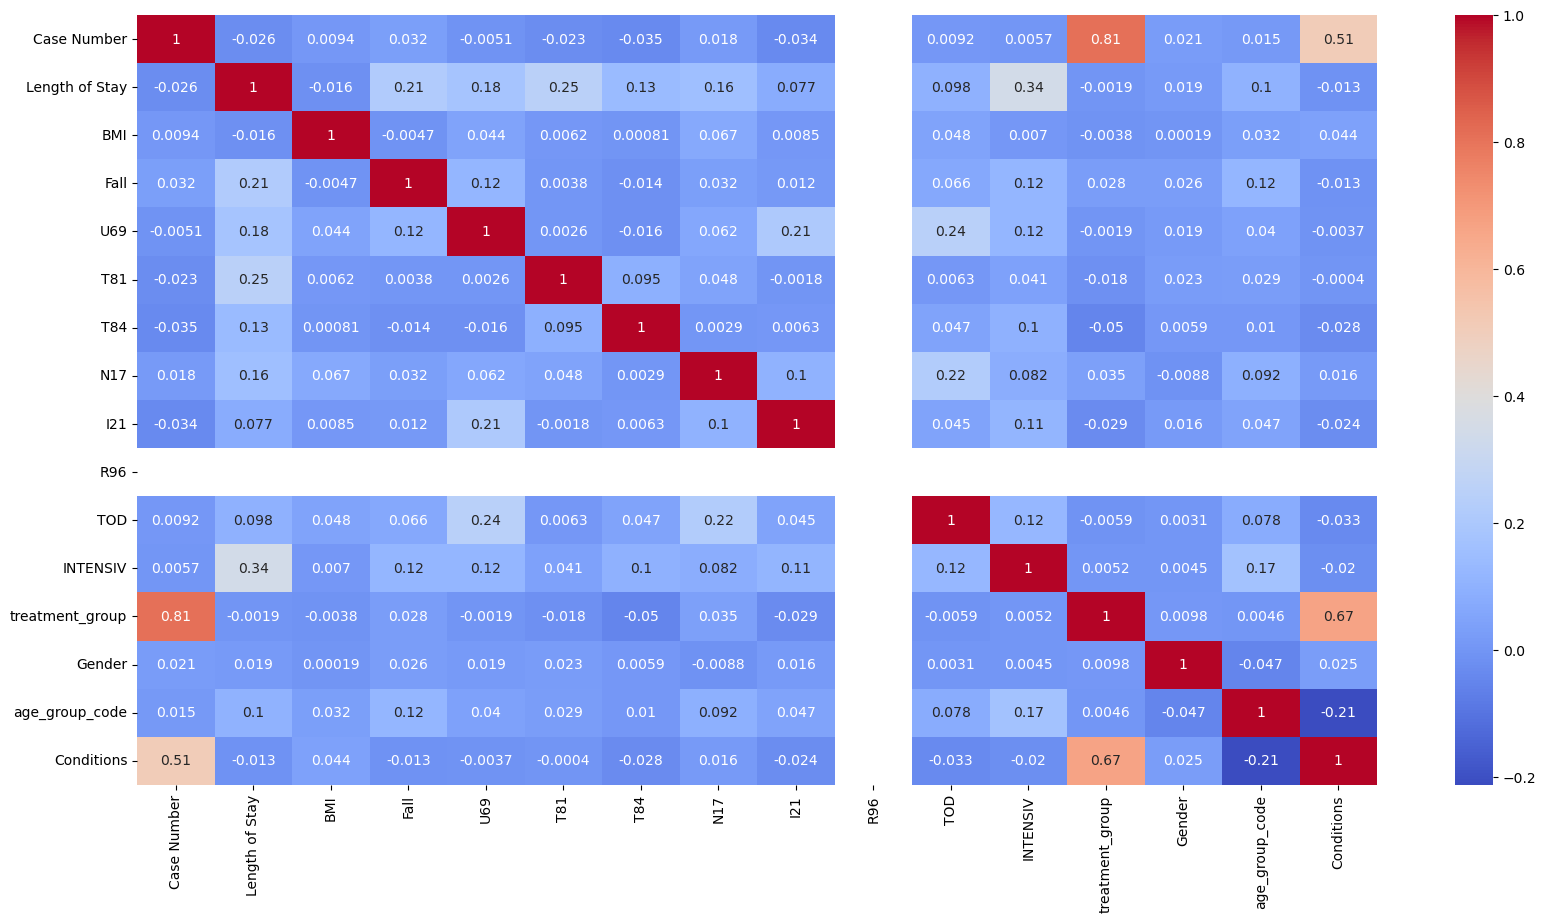

In [45]:
#Heatmap to check for correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(all_treatment.corr(), annot=True, cmap='coolwarm')
plt.show()